<a href="https://colab.research.google.com/github/hvr2026/Autogluon/blob/main/image%20classifier/Image_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --pre autogluon.multimodal
!pip install torchaudio==2.3.1


In [ ]:
!nproc
!MAKEFLAGS="-j$(nproc)" pip install mmcv==2.1.0 -f https://download.openmmlab.com/mmcv/dist/cu121/torch2.4/index.html
!pip install "mmdet==3.2.0"

2
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.4/index.html


In [ ]:
from autogluon.multimodal import MultiModalPredictor

In [ ]:
import os
import time

from autogluon.core.utils.loaders import load_zip

In [ ]:
zip_file = "https://automl-mm-bench.s3.amazonaws.com/object_detection_dataset/tiny_motorbike_coco.zip"
download_dir = "./tiny_motorbike_coco"

load_zip.unzip(zip_file, unzip_dir=download_dir)
data_dir = os.path.join(download_dir, "tiny_motorbike")
train_path = os.path.join(data_dir, "Annotations", "trainval_cocoformat.json")
test_path = os.path.join(data_dir, "Annotations", "test_cocoformat.json")

Unzipping ./tiny_motorbike_coco/file.zip to ./tiny_motorbike_coco


In [ ]:
presets = "medium_quality"

In [ ]:
# Init predictor
import uuid

model_path = f"./tmp/{uuid.uuid4().hex}-quick_start_tutorial_temp_save"

predictor = MultiModalPredictor(
    problem_type="object_detection",
    sample_data_path=train_path,
    presets=presets,
    path=model_path,
)

In [ ]:
start = time.time()
predictor.fit(train_path, time_limit=60*60)  # Fit
train_end = time.time()

=================== System Info ===================
AutoGluon Version:  1.1.2b20240913
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.3.1+cu121
CUDA Version:       CUDA is not available
Memory Avail:       6.66 GB / 12.67 GB (52.5%)
Disk Space Avail:   WARNING, an exception (FileNotFoundError) occurred while attempting to get available disk space. Consider opening a GitHub Issue.
Using default root folder: ./tiny_motorbike_coco/tiny_motorbike/Annotations/... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!



AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir /content/tmp/66a8eca06d7f4088bfd8808ae652e0d4-quick_start_tutorial_temp_save
    ```

INFO: Seed set to 0


Loads checkpoint by local backend from path: yolox_l_8x8_300e_coco_20211126_140236-d3bd2b23.pth


GPU Count: 0
GPU Count to be Used: 0



The model and loaded state dict do not match exactly

size mismatch for bbox_head.multi_level_conv_cls.0.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 256, 1, 1]).
size mismatch for bbox_head.multi_level_conv_cls.0.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([10]).
size mismatch for bbox_head.multi_level_conv_cls.1.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 256, 1, 1]).
size mismatch for bbox_head.multi_level_conv_cls.1.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([10]).
size mismatch for bbox_head.multi_level_conv_cls.2.weight: copying a param with shape torch.Size([80, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([10, 256, 1, 1]).
size mismatch for bbox_head.multi_level_conv

/usr/local/lib/python3.10/dist-packages/autogluon/multimodal/utils/environment.py:131: UserWarning: Only CPU is detected in the instance. This may result in slow speed for MultiModalPredictor. Consider using an instance with GPU support.
  warnings.warn(
INFO: GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: `Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
INFO: 
  | Name              | Type                             | Params | Mode 
-------------------------------------------------------------------------------
0 | model             | MMDetAutoModelForObjectDetection | 54.2 M | train
1 | validation_metric | MeanAveragePrecision             | 0      | train
-------------------------------------------------------------------------------
54.2 M    Trainable params
0         Non-trainable params
54.2 M    Total params
216.620   Total estimated model p

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Training: |          | 0/? [00:00<?, ?it/s]

INFO: Time limit reached. Elapsed time is 1:00:15. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 10: 'val_map' reached 0.32363 (best 0.32363), saving model to '/content/tmp/66a8eca06d7f4088bfd8808ae652e0d4-quick_start_tutorial_temp_save/epoch=2-step=10.ckpt' as top 1
AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/tmp/66a8eca06d7f4088bfd8808ae652e0d4-quick_start_tutorial_temp_save")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




Notice that at the end of each progress bar, if the checkpoint at current stage is saved,
it prints the model's save path.
In this example, it's `./quick_start_tutorial_temp_save`.

Print out the time and we can see that it's fast!

In [ ]:
print("This finetuning takes %.2f seconds." % (train_end - start))

This finetuning takes 3818.69 seconds.


## Evaluation

To evaluate the model we just trained, run following code.

And the evaluation results are shown in command line output.
The first line is mAP in COCO standard, and the second line is mAP in VOC standard (or mAP50).
For more details about these metrics, see [COCO's evaluation guideline](https://cocodataset.org/#detection-eval).
Note that for presenting a fast finetuning we use presets "medium_quality",
you could get better result on this dataset by simply using "high_quality" or "best_quality" presets,
or customize your own model and hyperparameter settings: [Customization](../../advanced_topics/customization.ipynb), and some other examples at [Fast Fine-tune Coco](../finetune/detection_fast_finetune_coco) or [High Performance Fine-tune Coco](../finetune/detection_high_performance_finetune_coco).

In [ ]:
predictor.evaluate(test_path)
eval_end = time.time()

Using default root folder: ./tiny_motorbike_coco/tiny_motorbike/Annotations/... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
A new predictor save path is created. This is to prevent you to overwrite previous predictor saved here. You could check current save path at predictor._save_path. If you still want to use this path, set resume=True
No path specified. Models will be saved in: "AutogluonModels/ag-20240913_194046"


saving file at /content/AutogluonModels/ag-20240913_194046/object_detection_result_cache.json
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.06s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.296
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.479
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.327
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.222
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.276
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.590
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.208
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=  

Print out the evaluation time:

In [ ]:
print("The evaluation takes %.2f seconds." % (eval_end - train_end))

The evaluation takes 179.58 seconds.


We can load a new predictor with previous save_path,
and we can also reset the number of GPUs to use if not all the devices are available:

In [ ]:
# Load and reset num_gpus
new_predictor = MultiModalPredictor.load(model_path)
new_predictor.set_num_gpus(1)

Load pretrained checkpoint: /content/tmp/66a8eca06d7f4088bfd8808ae652e0d4-quick_start_tutorial_temp_save/model.ckpt


Evaluating the new predictor gives us exactly the same result:

In [ ]:
# Evaluate new predictor
new_predictor.evaluate(test_path)

Using default root folder: ./tiny_motorbike_coco/tiny_motorbike/Annotations/... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/usr/local/lib/python3.10/dist-packages/autogluon/multimodal/utils/environment.py:62: UserWarning: Using the detected GPU number 0, smaller than the GPU number 1 in the config.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
A new predictor save path is created. This is to prevent you to overwrite previous predictor saved here. You could check current save path at predictor._save_path. If you still want to use this path, set resume=True
No path specified. Models will be saved in: "AutogluonModels/ag-20240913_194350"


saving file at /content/AutogluonModels/ag-20240913_194350/object_detection_result_cache.json
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.17s).
Accumulating evaluation results...
DONE (t=0.05s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.296
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.479
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.327
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.222
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.276
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.590
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.208
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=  

{'map': 0.29628190785101954,
 'mean_average_precision': 0.29628190785101954,
 'map_50': 0.4792443298478851,
 'map_75': 0.3266377373766652,
 'map_small': 0.22193244577351615,
 'map_medium': 0.2764761689763146,
 'map_large': 0.5901852347862804,
 'mar_1': 0.20829316420014096,
 'mar_10': 0.37727460653042044,
 'mar_100': 0.3974686398872445,
 'mar_small': 0.3252083333333333,
 'mar_medium': 0.37833333333333335,
 'mar_large': 0.7400179937022042}

For how to set the hyperparameters and finetune the model with higher performance,
see [AutoMM Detection - High Performance Finetune on COCO Format Dataset](../finetune/detection_high_performance_finetune_coco.ipynb).

## Inference
Now that we have gone through the model setup, finetuning, and evaluation, this section details the inference.
Specifically, we layout the steps for using the model to make predictions and visualize the results.

To run inference on the entire test set, perform:

In [ ]:
pred = predictor.predict(test_path)
print(pred)

Using default root folder: ./tiny_motorbike_coco/tiny_motorbike/Annotations/... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


                                                image  \
0   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
1   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
2   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
3   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
4   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
5   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
6   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
7   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
8   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
9   ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
10  ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
11  ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
12  ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
13  ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
14  ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
15  ./tiny_motorbike_coco/tiny_motorbike/Annotatio...   
16  ./tiny_motorbike_coco/tiny_

The output `pred` is a `pandas` `DataFrame` that has two columns, `image` and `bboxes`.

In `image`, each row contains the image path

In `bboxes`, each row is a list of dictionaries, each one representing a bounding box: `{"class": <predicted_class_name>, "bbox": [x1, y1, x2, y2], "score": <confidence_score>}`

Note that, by default, the `predictor.predict` does not save the detection results into a file.

To run inference and save results, run the following:

In [ ]:
pred = predictor.predict(test_path, save_results=True)

Using default root folder: ./tiny_motorbike_coco/tiny_motorbike/Annotations/... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Predicting: |          | 0/? [00:00<?, ?it/s]

A new predictor save path is created. This is to prevent you to overwrite previous predictor saved here. You could check current save path at predictor._save_path. If you still want to use this path, set resume=True
No path specified. Models will be saved in: "AutogluonModels/ag-20240913_194949"
Saved detection results to /content/AutogluonModels/ag-20240913_194949/result.txt


Here, we save `pred` into a `.txt` file, which exactly follows the same layout as in `pred`.
You can use a predictor initialized in any way (i.e. finetuned predictor, predictor with pretrained model, etc.).

## Visualizing Results
To run visualizations, ensure that you have `opencv` installed. If you haven't already, install `opencv` by running

In [ ]:
!pip install opencv-python

To visualize the detection bounding boxes, run the following:

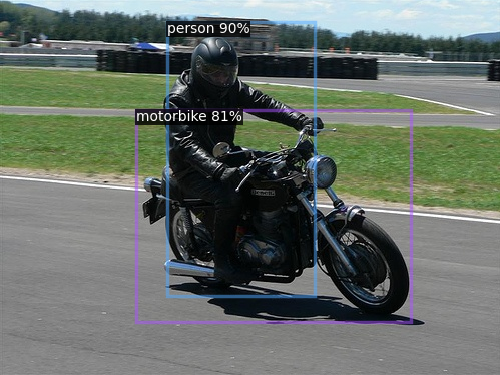

In [ ]:
from autogluon.multimodal.utils import ObjectDetectionVisualizer

conf_threshold = 0.4  # Specify a confidence threshold to filter out unwanted boxes
image_result = pred.iloc[30]

img_path = image_result.image  # Select an image to visualize

visualizer = ObjectDetectionVisualizer(img_path)  # Initialize the Visualizer
out = visualizer.draw_instance_predictions(image_result, conf_threshold=conf_threshold)  # Draw detections
visualized = out.get_image()  # Get the visualized image

from PIL import Image
from IPython.display import display
img = Image.fromarray(visualized, 'RGB')
display(img)

## Testing on Your Own Data
You can also predict on your own images with various input format. The follow is an example:

Download the example image:

In [ ]:
from autogluon.multimodal import download
image_url = "https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/detection/street_small.jpg"
test_image = download(image_url)

In [ ]:
import json

# create a input file for demo
data = {"images": [{"id": 0, "width": -1, "height": -1, "file_name": test_image}], "categories": []}
os.mkdir("input_data_for_demo")
input_file = "input_data_for_demo/demo_annotation.json"
with open(input_file, "w+") as f:
    json.dump(data, f)

pred_test_image = predictor.predict(input_file)
print(pred_test_image)

Using default root folder: input_data_for_demo/... Specify `root=...` if you feel it is wrong...


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Predicting: |          | 0/? [00:00<?, ?it/s]

                                     image  \
0  input_data_for_demo/../street_small.jpg   

                                              bboxes  
0  [{'class': 'car', 'class_id': 3, 'bbox': [234....  


Run inference on data in a list of image file names:

In [ ]:
pred_test_image = predictor.predict([test_image])
print(pred_test_image)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Predicting: |          | 0/? [00:00<?, ?it/s]

              image                                             bboxes
0  street_small.jpg  [{'class': 'car', 'class_id': 3, 'bbox': [234....
